In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, welch

In [2]:
order = 4 # 4th order filter
sampling_rate = 500.0 # Hz
    # Define the low and high cutoff frequencies
low_cutoff_frequency = 1.0 # Hz
high_cutoff_frequency = 50.0 # Hz

    # Calculate the Nyquist frequency
nyquist_frequency = 0.5 * sampling_rate
# Normalize the frequencies
low_cutoff_normalized = low_cutoff_frequency / nyquist_frequency
high_cutoff_normalized = high_cutoff_frequency / nyquist_frequency

    # Design the Butterworth band-pass filter
b, a = butter(order, [low_cutoff_normalized, high_cutoff_normalized], btype='band')

    # Replace this with your actual data
data = np.loadtxt("data.dat")
filtered_data_a = lfilter(b, a, data[:,0])
filtered_data_b = lfilter(b, a, data[:,1])



In [3]:
fig = plt.figure(figsize=(9, 6),num=f"{L}-{P}-{inh}-{Trest}-{Treltive}")
    
    plt.subplot(3, 2, 1)
    plt.plot(data[:,0], label='# Activadas')
    plt.title("#Activadas")
    plt.grid()
    
    plt.subplot(3, 2, 2)
    plt.plot(data[:,1], label='Potencial')
    plt.title("Potencial")
    plt.grid()
    

    plt.subplot(3, 2, 3)
    plt.plot(filtered_data_a, label='Filtro butter Activadas')
    plt.title("Filtro butter Activadas")
    plt.grid()


    plt.subplot(3, 2, 4)
    plt.plot(filtered_data_b, label='Filtro butter potencial')
    plt.title("Filtro butter potencial")
    plt.grid()
    
    plt.subplot(3, 2, 5)
    plt.plot(frequencies_a, alplitud_a, label='Potencial')
    plt.title("Periodograma activadas")
    plt.grid()
    
    plt.subplot(3, 2, 6)
    plt.plot(frequencies_b, alplitud_b, label='Potencial')
    delta=alplitud_b[0]-alplitud_a[0]
    plt.plot(frequencies_a, alplitud_a+delta, label='Potencial')
    plt.title("Periodograma potencial")
    plt.grid()


    plt.tight_layout() # Ajusta el layout para que las subgráficas no se solapen
    #plt.savefig(f"random/{L}-{P}-{inh}-{Trest}-{Treltive}.png")
    plt.show()


IndentationError: unexpected indent (1348003489.py, line 3)

In [ ]:
L,P,Lrest,Lreltive,apha,t,inh=np.loadtxt("input.txt")
L=int(L)

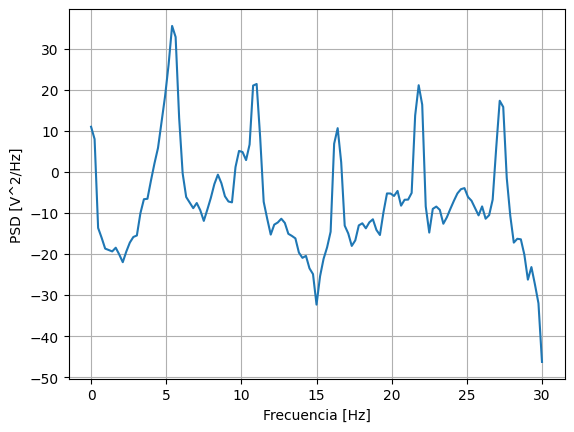

In [ ]:
NFFT = 256
OVERLAP = NFFT/2 # Time scale
dt = 1.0 / 60.0 # Sampling rate
fs = 1.0 / dt # Frequency scale



# Calcular la PSD usando el método de Welch
frequencies, psd = welch(data[:,0], fs, nperseg=NFFT, noverlap=OVERLAP)
alplitud=np.zeros_like(psd)
# Imprimir los resultados
for i in range(len(frequencies)):
    alplitud[i]=10 * np.log10(psd[i])

# Graficar la PSD
plt.plot(frequencies, alplitud)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V^2/Hz]')
plt.grid(True)
plt.show()



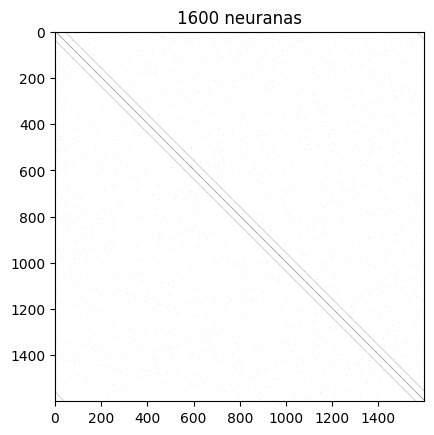

In [ ]:
matriz = np.loadtxt('matriz.dat')

# Visualizar la matriz con imshow
plt.imshow(matriz, cmap='binary')
# Muestra la gráfica
plt.title(f"{L*L} neuranas")
plt.show()


0.9999999999999999


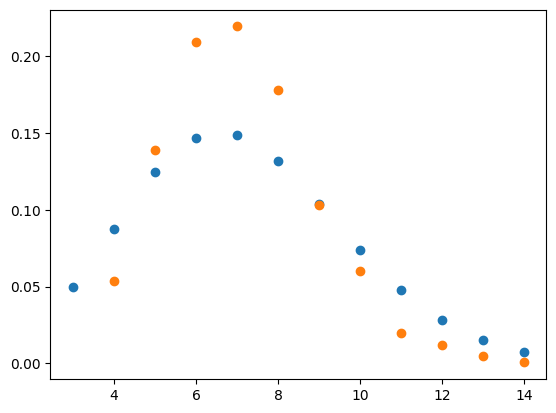

In [ ]:
from scipy.special import factorial
k=np.zeros(len(matriz))
for i in range(len(matriz)):
    k[i]=np.sum(matriz[i])

unique_values, counts = np.unique(k, return_counts=True)
print(sum(counts/len(matriz)))
k_main=sum(k)/len(matriz)
def poisson(k,k_mid=k_main):
    return np.exp(-k_mid)*(k_mid**k)/factorial(k)
x=np.arange(unique_values.min()-1,unique_values.max()+1,1)
plt.scatter(x,poisson(x))
plt.scatter(unique_values,counts/len(matriz))


In [ ]:
import heapq

def dijkstra(graph, start):
    distances = {node: float('inf') for node in range(len(graph))}
    distances[start] = 0
    queue = [(0, start)]
    
    while queue:
        current_distance, current_node = heapq.heappop(queue)
        
        if current_distance > distances[current_node]:
            continue
        
        # Corrected iteration over neighbors
        for neighbor_index in range(len(graph)):
            weight = graph[current_node][neighbor_index]
            if weight == 1:  # Assuming weight 1 means there's an edge between nodes
                distance = current_distance + weight
                if distance < distances[neighbor_index]:
                    distances[neighbor_index] = distance
                    heapq.heappush(queue, (distance, neighbor_index))
    
    return distances


distances = dijkstra(matriz, 0)
print(distances)
# d_ind=0
# for i in range(L*L):
#     for j in range(L*L):
#         d_ind+=dijkstra(matriz, i)[j]
# print(d_ind/(L*L*(L*L-1)))
        


{0: 0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 4.0, 6: 5.0, 7: 4.0, 8: 3.0, 9: 4.0, 10: 4.0, 11: 5.0, 12: 5.0, 13: 4.0, 14: 4.0, 15: 5.0, 16: 6.0, 17: 5.0, 18: 4.0, 19: 5.0, 20: 4.0, 21: 5.0, 22: 4.0, 23: 4.0, 24: 5.0, 25: 5.0, 26: 5.0, 27: 5.0, 28: 5.0, 29: 5.0, 30: 4.0, 31: 5.0, 32: 5.0, 33: 4.0, 34: 3.0, 35: 4.0, 36: 4.0, 37: 3.0, 38: 2.0, 39: 1.0, 40: 1.0, 41: 2.0, 42: 3.0, 43: 4.0, 44: 5.0, 45: 4.0, 46: 5.0, 47: 4.0, 48: 4.0, 49: 5.0, 50: 4.0, 51: 5.0, 52: 5.0, 53: 5.0, 54: 5.0, 55: 5.0, 56: 5.0, 57: 5.0, 58: 5.0, 59: 4.0, 60: 5.0, 61: 4.0, 62: 3.0, 63: 4.0, 64: 5.0, 65: 5.0, 66: 5.0, 67: 5.0, 68: 4.0, 69: 4.0, 70: 4.0, 71: 4.0, 72: 4.0, 73: 3.0, 74: 2.0, 75: 3.0, 76: 4.0, 77: 4.0, 78: 3.0, 79: 2.0, 80: 2.0, 81: 3.0, 82: 4.0, 83: 5.0, 84: 4.0, 85: 5.0, 86: 5.0, 87: 4.0, 88: 3.0, 89: 4.0, 90: 3.0, 91: 4.0, 92: 5.0, 93: 5.0, 94: 5.0, 95: 5.0, 96: 5.0, 97: 5.0, 98: 4.0, 99: 5.0, 100: 4.0, 101: 4.0, 102: 4.0, 103: 5.0, 104: 4.0, 105: 5.0, 106: 4.0, 107: 5.0, 108: 4.0, 109: 3.0, 110: 3.0, 1

In [ ]:
d_ind=0
#for i in range(L*L):
 #       d_ind+=dijkstra(matriz, i)
print(dijkstra(matriz,0))
sum(dijkstra(matriz, 0))


{0: 0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 4.0, 6: 5.0, 7: 4.0, 8: 3.0, 9: 4.0, 10: 4.0, 11: 5.0, 12: 5.0, 13: 4.0, 14: 4.0, 15: 5.0, 16: 6.0, 17: 5.0, 18: 4.0, 19: 5.0, 20: 4.0, 21: 5.0, 22: 4.0, 23: 4.0, 24: 5.0, 25: 5.0, 26: 5.0, 27: 5.0, 28: 5.0, 29: 5.0, 30: 4.0, 31: 5.0, 32: 5.0, 33: 4.0, 34: 3.0, 35: 4.0, 36: 4.0, 37: 3.0, 38: 2.0, 39: 1.0, 40: 1.0, 41: 2.0, 42: 3.0, 43: 4.0, 44: 5.0, 45: 4.0, 46: 5.0, 47: 4.0, 48: 4.0, 49: 5.0, 50: 4.0, 51: 5.0, 52: 5.0, 53: 5.0, 54: 5.0, 55: 5.0, 56: 5.0, 57: 5.0, 58: 5.0, 59: 4.0, 60: 5.0, 61: 4.0, 62: 3.0, 63: 4.0, 64: 5.0, 65: 5.0, 66: 5.0, 67: 5.0, 68: 4.0, 69: 4.0, 70: 4.0, 71: 4.0, 72: 4.0, 73: 3.0, 74: 2.0, 75: 3.0, 76: 4.0, 77: 4.0, 78: 3.0, 79: 2.0, 80: 2.0, 81: 3.0, 82: 4.0, 83: 5.0, 84: 4.0, 85: 5.0, 86: 5.0, 87: 4.0, 88: 3.0, 89: 4.0, 90: 3.0, 91: 4.0, 92: 5.0, 93: 5.0, 94: 5.0, 95: 5.0, 96: 5.0, 97: 5.0, 98: 4.0, 99: 5.0, 100: 4.0, 101: 4.0, 102: 4.0, 103: 5.0, 104: 4.0, 105: 5.0, 106: 4.0, 107: 5.0, 108: 4.0, 109: 3.0, 110: 3.0, 1

1279200

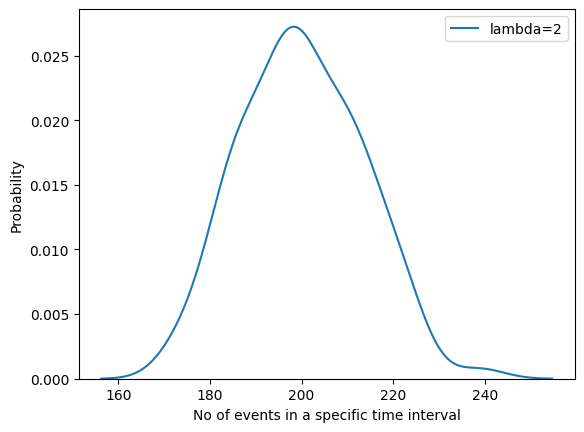

In [4]:
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt

#Generating Poisson data
sample1 = poisson.rvs(mu=200, size=100)
#Plotting Poisson Distribution using Seaborn
sns.kdeplot(x=sample1, fill=False, label='lambda=2')
plt.xlabel('No of events in a specific time interval')
plt.ylabel('Probability')
plt.legend()
plt.show()

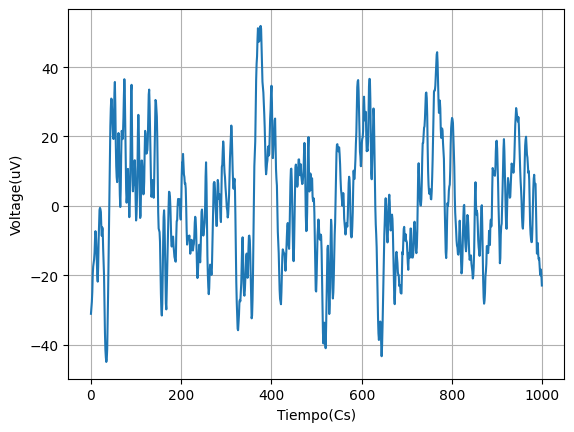

In [8]:
reales=np.loadtxt("real.txt")
plt.plot(reales[:1000])
plt.xlabel("Tiempo(Cs)")
plt.ylabel("Voltage(uV)")
plt.grid()

